In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
apps = pd.read_csv('googleplaystore.csv')

In [5]:
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [6]:
print(apps.shape, reviews.shape)
print(apps.info())
print(reviews.info())

(10841, 13) (64295, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                

In [7]:
apps.drop(10472, axis=0, inplace=True)

In [8]:
apps['Reviews'] = apps['Reviews'].astype(int)

In [9]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [10]:
apps['Size'] = apps['Size'].apply(convert_size)

In [11]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = apps['Installs'].replace('Free', np.nan)
apps['Installs'] = apps['Installs'].astype(float)

In [12]:
apps['Price'] = apps['Price'].str.replace('$', '').astype(float)

In [13]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']

In [14]:
apps['Installs_category'] = pd.cut(apps['Installs'], bins=bins, labels=labels)

In [15]:
def fill_missing_ratings(df, category, fill_value):
    filter_ = (df['Installs_category'] == category) & (df['Rating'].isna())
    df.loc[filter_, 'Rating'] = fill_value
    return df

In [16]:
median_ratings = apps.groupby('Installs_category')['Rating'].median()

In [17]:
for cat, median_val in median_ratings.items():
    apps = fill_missing_ratings(apps, cat, median_val)

In [18]:
apps.drop_duplicates(inplace=True)

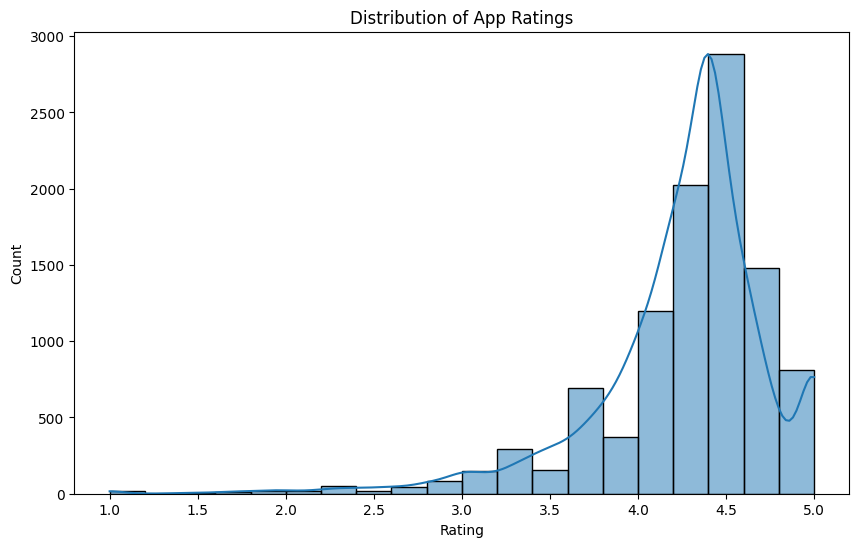

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

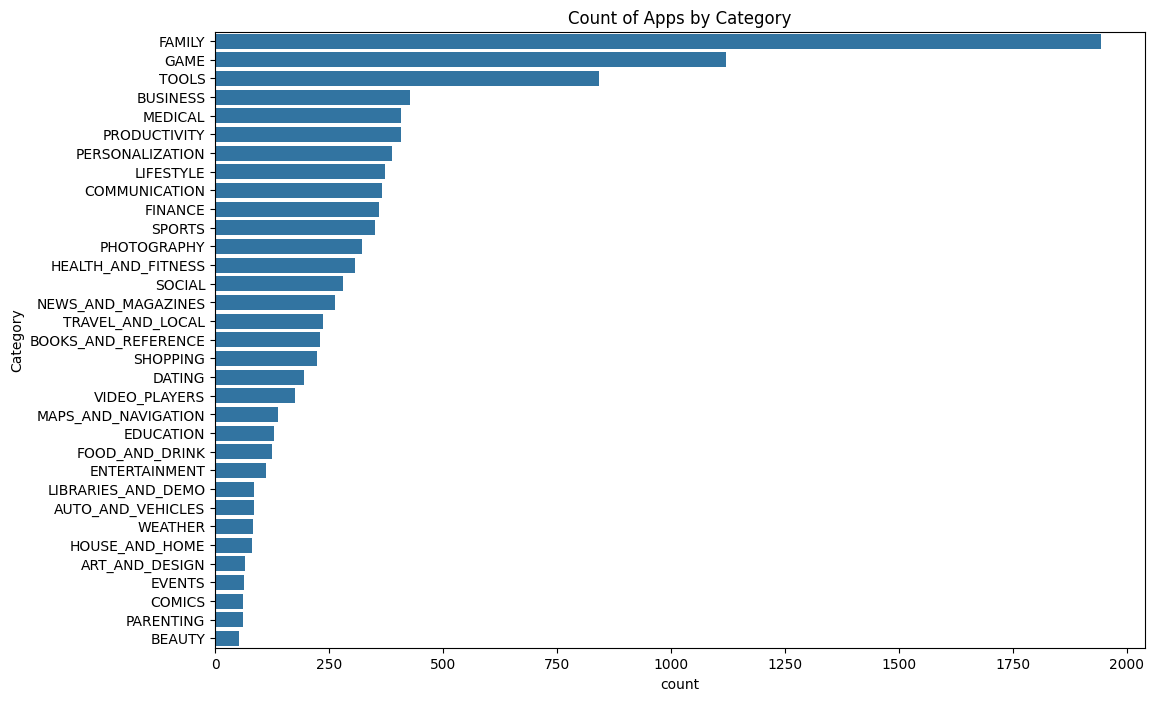

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

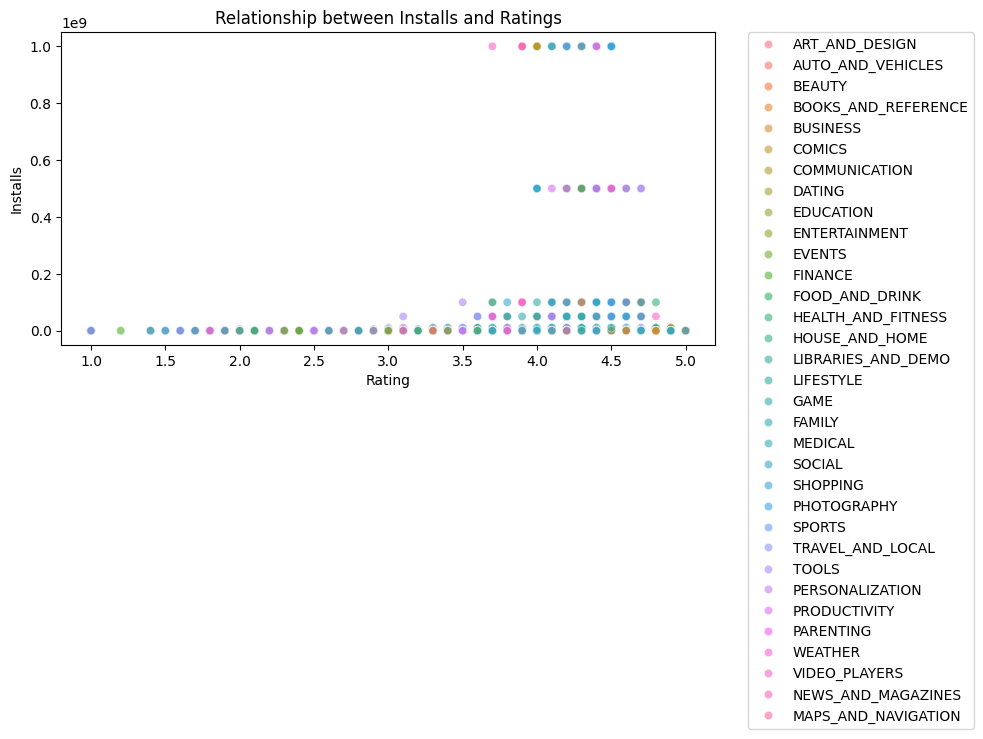

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Installs', hue='Category', data=apps, alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Relationship between Installs and Ratings')
plt.tight_layout() 
plt.show()

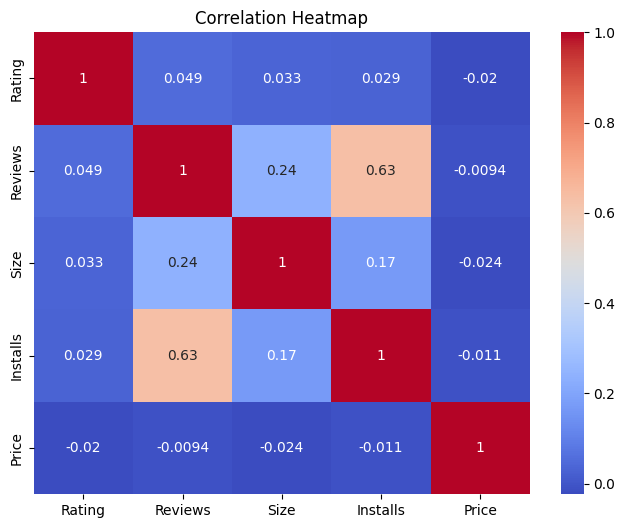

In [23]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(8,6))
sns.heatmap(apps[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
display(reviews.head())

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [26]:
merged = pd.merge(apps, reviews, on='App', how='left')

In [27]:
apps.to_csv('cleaned_googleplaystore.csv', index=False)